## LABORATORIO 3: BEHAVIORAL ECONOMICS IN TRADING

#### Proposito: 
Que utilices la infomracion historica de la cuenta de trading manual, mediante la formulacion y programaciones de 3 "sesgos cognitivos" realices una evaluacion del desempeño de la cuenta utilizando el marco de "behavioral economics". Con finalidad de inferir di al momento de tomar decisiones que se tomaron en esa cuenta, se estuvo incurriendo en esos 3 "Sesgos cognitivos" y su impacto en el resultado final.

EQUIPO 6:
* Paulina Rodriguez
* Antonio Tirado
* Jose Luis Suarez
* Pablo Vargas

### TRABAJO DEL EQUIPO
Mediante este laboratorio vamos a examinar si el trader tiende a tener un comportamiento llamado "exceso de confianza", usando un lapso de tiempo diario, proponiendo el parametro de si realiza 5 o mas transacciones cuenta con este comportamiento y en horas si excede a 3 transacciones por horas

### Importar librerias

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


### Función 

In [6]:
def OverConfidence (archivo,num,dh):
    def f_datosent(p0_archivo):
        """
        :param p0_archivo: archivo de entrada
        :return resultado

        debbuging
        p0_archivo = 'archivo_tradeview_2.xlsx'

        """
        import pandas as pd
        import json

        file_type = p0_archivo[-4:]
        # Opciones para visualizar data frames en consola
        pd.set_option('display.max_rows',5000)
        pd.set_option('display.max_columns',500)
        pd.set_option('display.width',1000)

        # Ingreso de datos de entrada: Leer archivo JSON
        archivo = p0_archivo

        if file_type == 'json':
            with open(archivo, encoding='utf-8-sig') as json_file:
                datos_2 = json.load(json_file)['data']

            # Seleccionar la seccion de 'closedTransactions' que es la de interes
            df_datos = pd.DataFrame(datos_2['closedTransactions']['list'])

            # Seleccionar solo los renglones de operaciones
            df_datos = df_datos[(df_datos['type'] == 'buy') | (df_datos['type'] == 'sell') | (df_datos['type'] == 's/l') |
                    (df_datos['type'] == 't/p')]

            # Resetear index para tener todos los numeros de indice completos
            df_datos = df_datos.reset_index()

            # Eliminar columnas 'info' e 'index'
            df_datos = df_datos.drop(['info', 'index'], 1)

            # Renombrar columnas
            df_datos.rename(columns = {'SL': 'sl', 'TP':'tp', 'price':'openPrice', 'price2':'closePrice', 'item':'Instrument'},
                            inplace=True)
            return df_datos
        elif file_type == 'xlsx':
            df_datos = pd.read_excel(archivo, sheet_name = 'Hoja1', col_header=0)
            return df_datos
        df = f_datosent(p0_archivo = archivo)
    
    
    
    
    
    
    if dh==1:
        x=df['openTime']
        p=[]
        for i in range(len(df)):
    
            itemArr = df.loc[:,'openTime']
            item = itemArr.values[i]
            izq = item[:10]
            p.append([izq])
    
#Jalamos la columna Profit del .csv
        proArr = df.loc[:,'Profit']
        def listasinsignos(p): return str(p).replace('.','').replace('[','').replace(']','').replace(',','')
        pp=listasinsignos(p)

#convertir string a lista
        def Convert(string): 
            li = list(string.split(" ")) 
            return li 

        pf=Convert(pp)

        tabla=pd.DataFrame({'fecha':pf,'profit':proArr})
        ptabla=tabla['fecha']

#Usamos la funcion Counter para contar cuantas veces se repiten las palabras
        counter = Counter(ptabla)
        d = pd.DataFrame.from_dict(counter, orient='index').reset_index()
        d.columns = ['fecha', 'count']
        cantidad=d['count']
        
        
        filtro=[]

        for i in range(len(cantidad)):
            if cantidad[i] >=  num:
                filtro.append(1)
            else:
                filtro.append(0)



        confiado=sum(filtro)/len(cantidad)
        desconfiado= 1-confiado

        colnames = list(d.columns)
        #Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
        d["filtro"] = filtro

        #Insertamos en la columna 7 esta variable creada arriba
        colnames.insert(3,'filtro')

        #Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
        Tabla_Final = d[colnames]

        #Hace display a "Tabla Final"
        print(Tabla_Final)



        #Parametros de la lista
        labels = ('confiado', 'descondiado')
        sizes = [confiado, desconfiado]
        colors = ['royalblue', 'goldenrod']
        explode = (0.05, 0)  # explode 1st slice

        # Plot
        plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
        plt.axis('equal')
        plt.suptitle('% de transacciones con exceso de confianza diario', color = 'mediumblue', size = 17)
        plt.show()
        
        
        k=Tabla_Final['filtro']==1
        filconfiado = Tabla_Final[k]
        filconfiado.head(10)

        
        todasf=tabla['fecha']#todas las fechas
        kk=tabla['profit']#todos los profit
        fechafil=filconfiado['fecha'] #fechas que quiero

        #vlookup de fechas de confianza
        xx=pd.DataFrame(fechafil)
        m1=list(todasf)
        sh1=list(kk)
        junto=[m1,sh1]#union fechas y profit
        ss=pd.DataFrame(junto).T
        ss.columns=['fecha','profit']
        x1s      = pd.merge(xx,ss,on='fecha')
        monto=x1s['profit']

        pg=[]
        for i in range (len(x1s)):
            if monto[i]>=0:
                pg.append(1)
            else:
                pg.append(0)

        gano=sum(pg)/len(x1s)
        perdio= 1-gano


        #Parametros de la lista
        labels = ('operaciones +', 'operaciones -')
        sizes = [gano, perdio]
        colors = ['royalblue', 'goldenrod']
        explode = (0.05, 0)  # explode 1st slice

        # Plot
        plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
        plt.axis('equal')
        plt.suptitle('% de ganado y perdido de transacciones de alta confianza', color = 'mediumblue', size = 17)
        plt.show()
        
    if dh==2:
        t=[]
        for i in range(len(df)):

            itemArr = df.loc[:,'openTime']
            item = itemArr.values[i]
            izq = item[:13]
            t.append(izq)


        tablas=pd.DataFrame({'fecha':t,'profit':proArr})
        ta=pd.DataFrame(t)
        ta= ta.rename(columns={0:'fecha'})


        uno=[]
        for i in range (len(t)):
            uno.append(1)

        #Definimos la variable de "colnames" como la lista de todas las columnas de "ResultadoFinal" asignada arriba                
        colnames = list(ta.columns)

        #Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
        ta["unos"] = uno

        #Insertamos en la columna 7 esta variable creada arriba
        colnames.insert(2,'unos')

        #Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
        Tabla_Final2 = ta[colnames]


        w=Tabla_Final2.groupby('fecha')['unos'].sum()
        #w=list(w)
        ww=pd.DataFrame(w)

        ww=ww.add_suffix('_Count').reset_index()
        horas=ww.iloc[:,1]
        filtros=[]

        for i in range(len(horas)):
            if horas[i] >= num:
                filtros.append(1)
            else:
                filtros.append(0)

        confiado=sum(filtros)/len(horas)
        desconfiado= 1-confiado

        #Definimos la variable de "colnames" como la lista de todas las columnas de "ResultadoFinal" asignada arriba                
        colname = list(ww.columns)

        #Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
        ww["filtro"] = filtros

        #Insertamos en la columna 7 esta variable creada arriba
        colname.insert(3,'filtro')

        #Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
        thoras = ww[colname]



        #Parametros de la lista
        labels = ('confiado', 'descondiado')
        sizes = [confiado, desconfiado]
        colors = ['royalblue', 'goldenrod']
        explode = (0.05, 0)  # explode 1st slice

        # Plot
        plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
        plt.axis('equal')
        plt.suptitle('% de transacciones con exceso de confianza', color = 'mediumblue', size = 17)
        plt.show()
        k=thoras['filtro']==1
        filconfiadoh = thoras[k]
        g=filconfiadoh.iloc[:,1]
        todasf=tablas['fecha']#todas las fechas
        kk=tablas['profit']#todos los profit
        fechafil=filconfiadoh['fecha'] #fechas que quiero

        #vlookup de fechas de confianza
        xx=pd.DataFrame(fechafil)
        m1=list(todasf)
        sh1=list(kk)
        junto=[m1,sh1]#union fechas y profit
        ss=pd.DataFrame(junto).T
        ss.columns=['fecha','profit']
        x1s      = pd.merge(xx,ss,on='fecha')
        monto=x1s['profit']

        pg=[]
        for i in range (len(x1s)):
            if monto[i]>=0:
                pg.append(1)
            else:
                pg.append(0)

        gano=sum(pg)/len(x1s)
        perdio= 1-gano


        #Parametros de la lista
        labels = ('operaciones +', 'operaciones -')
        sizes = [gano, perdio]
        colors = ['royalblue', 'goldenrod']
        explode = (0.05, 0)  # explode 1st slice

        # Plot
        plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
        plt.axis('equal')
        plt.suptitle('% de ganado y perdido de transacciones de alta confianza', color = 'mediumblue', size = 17)
        plt.show()
        
    return tabla



In [8]:
#pones la carpeta a analizar
df = f_datosent(p0_archivo = 'archivo_tradeview_0.xlsx')


NameError: name 'f_datosent' is not defined

### DIARIO

In [4]:
x=df['openTime']
p=[]
for i in range(len(df)):
    
    itemArr = df.loc[:,'openTime']
    item = itemArr.values[i]
    izq = item[:10]
    p.append([izq])
    
#Jalamos la columna Profit del .csv
proArr = df.loc[:,'Profit']


In [5]:
    def listasinsignos(p): return str(p).replace('.','').replace('[','').replace(']','').replace(',','')
    pp=listasinsignos(p)

    #convertir string a lista
    def Convert(string): 
        li = list(string.split(" ")) 
        return li 

    pf=Convert(pp)

    tabla=pd.DataFrame({'fecha':pf,'profit':proArr})
    ptabla=tabla['fecha']

    #Usamos la funcion Counter para contar cuantas veces se repiten las palabras
    counter = Counter(ptabla)
    d = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    d.columns = ['fecha', 'count']
    cantidad=d['count']

tabla

,fecha,profit
0,'20190827',17.92
1,'20190827',-2.73
2,'20190827',5.00
3,'20190828',0.27
4,'20190829',-0.34
5,'20190829',-0.23
6,'20190829',21.35
7,'20190829',5.96
8,'20190827',-9.98
9,'20190828',-25.64


         fecha  count  filtro
0   '20190827'     13       1
1   '20190828'      2       0
2   '20190829'      7       1
3   '20190830'      3       0
4   '20190902'      5       1
5   '20190903'      7       1
6   '20190911'      7       1
7   '20190913'      5       1
8   '20190917'      3       0
9   '20190919'      5       1
10  '20190925'      5       1
11  '20190926'      1       0
12  '20190904'      1       0
13  '20190905'      3       0
14  '20190906'      5       1
15  '20190912'      1       0
16  '20190916'      4       0
17  '20190924'      7       1


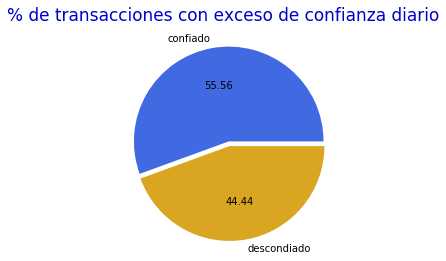

In [6]:
filtro=[]

for i in range(len(cantidad)):
    if cantidad[i] >= 5:
        filtro.append(1)
    else:
        filtro.append(0)
 


confiado=sum(filtro)/len(cantidad)
desconfiado= 1-confiado

colnames = list(d.columns)
#Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
d["filtro"] = filtro

#Insertamos en la columna 7 esta variable creada arriba
colnames.insert(3,'filtro')

#Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
Tabla_Final = d[colnames]

#Hace display a "Tabla Final"
print(Tabla_Final)



#Parametros de la lista
labels = ('confiado', 'descondiado')
sizes = [confiado, desconfiado]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('% de transacciones con exceso de confianza diario', color = 'mediumblue', size = 17)
plt.show()

In [7]:
#filtrado
k=Tabla_Final['filtro']==1
filconfiado = Tabla_Final[k]
filconfiado.head(10)

,fecha,count,filtro
0,'20190827',13,1
2,'20190829',7,1
4,'20190902',5,1
5,'20190903',7,1
6,'20190911',7,1
7,'20190913',5,1
9,'20190919',5,1
10,'20190925',5,1
14,'20190906',5,1
17,'20190924',7,1


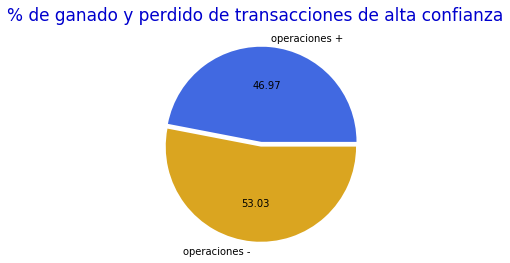

In [8]:
todasf=tabla['fecha']#todas las fechas
kk=tabla['profit']#todos los profit
fechafil=filconfiado['fecha'] #fechas que quiero

#vlookup de fechas de confianza
xx=pd.DataFrame(fechafil)
m1=list(todasf)
sh1=list(kk)
junto=[m1,sh1]#union fechas y profit
ss=pd.DataFrame(junto).T
ss.columns=['fecha','profit']
x1s      = pd.merge(xx,ss,on='fecha')
monto=x1s['profit']

pg=[]
for i in range (len(x1s)):
    if monto[i]>=0:
        pg.append(1)
    else:
        pg.append(0)
        
gano=sum(pg)/len(x1s)
perdio= 1-gano


#Parametros de la lista
labels = ('operaciones +', 'operaciones -')
sizes = [gano, perdio]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('% de ganado y perdido de transacciones de alta confianza', color = 'mediumblue', size = 17)
plt.show()

### HORAS

In [9]:
t=[]
for i in range(len(df)):
    
    itemArr = df.loc[:,'openTime']
    item = itemArr.values[i]
    izq = item[:13]
    t.append(izq)
    

tablas=pd.DataFrame({'fecha':t,'profit':proArr})
ta=pd.DataFrame(t)
ta= ta.rename(columns={0:'fecha'})


uno=[]
for i in range (len(t)):
    uno.append(1)
        
#Definimos la variable de "colnames" como la lista de todas las columnas de "ResultadoFinal" asignada arriba                
colnames = list(ta.columns)

#Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
ta["unos"] = uno

#Insertamos en la columna 7 esta variable creada arriba
colnames.insert(2,'unos')

#Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
Tabla_Final2 = ta[colnames]


w=Tabla_Final2.groupby('fecha')['unos'].sum()
#w=list(w)
ww=pd.DataFrame(w)

ww=ww.add_suffix('_Count').reset_index()
horas=ww.iloc[:,1]
tablas

,fecha,profit
0,2019.08.27 06,17.92
1,2019.08.27 17,-2.73
2,2019.08.27 19,5.00
3,2019.08.28 17,0.27
4,2019.08.29 06,-0.34
5,2019.08.29 06,-0.23
6,2019.08.29 06,21.35
7,2019.08.29 06,5.96
8,2019.08.27 17,-9.98
9,2019.08.28 17,-25.64


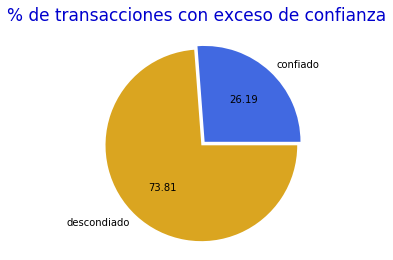

In [10]:
#confiado si tiene mas de dos transacciones por hora
filtros=[]

for i in range(len(horas)):
    if horas[i] >= 3:
        filtros.append(1)
    else:
        filtros.append(0)
        
confiado=sum(filtros)/len(horas)
desconfiado= 1-confiado

#Definimos la variable de "colnames" como la lista de todas las columnas de "ResultadoFinal" asignada arriba                
colname = list(ww.columns)

#Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
ww["filtro"] = filtros

#Insertamos en la columna 7 esta variable creada arriba
colname.insert(3,'filtro')

#Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
thoras = ww[colname]



#Parametros de la lista
labels = ('confiado', 'descondiado')
sizes = [confiado, desconfiado]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('% de transacciones con exceso de confianza', color = 'mediumblue', size = 17)
plt.show()

In [11]:

thoras

,fecha,unos_Count,filtro
0,2019.08.27 06,6,1
1,2019.08.27 09,1,0
2,2019.08.27 13,3,1
3,2019.08.27 17,2,0
4,2019.08.27 19,1,0
5,2019.08.28 17,2,0
6,2019.08.29 06,4,1
7,2019.08.29 19,2,0
8,2019.08.29 20,1,0
9,2019.08.30 02,2,0


In [12]:
#filtrado
k=thoras['filtro']==1
filconfiadoh = thoras[k]
g=filconfiadoh.iloc[:,1]
filconfiadoh

,fecha,unos_Count,filtro
0,2019.08.27 06,6,1
2,2019.08.27 13,3,1
6,2019.08.29 06,4,1
11,2019.09.02 01,4,1
13,2019.09.03 04,7,1
15,2019.09.05 20,3,1
16,2019.09.06 06,3,1
18,2019.09.11 01,4,1
27,2019.09.16 07,3,1
36,2019.09.24 01,4,1


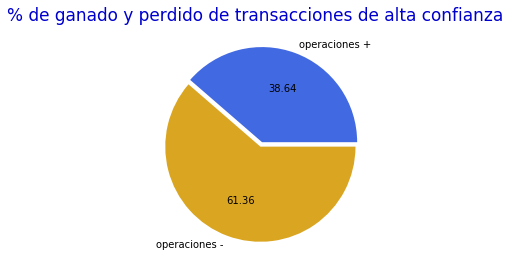

In [13]:
todasf=tablas['fecha']#todas las fechas
kk=tablas['profit']#todos los profit
fechafil=filconfiadoh['fecha'] #fechas que quiero

#vlookup de fechas de confianza
xx=pd.DataFrame(fechafil)
m1=list(todasf)
sh1=list(kk)
junto=[m1,sh1]#union fechas y profit
ss=pd.DataFrame(junto).T
ss.columns=['fecha','profit']
x1s      = pd.merge(xx,ss,on='fecha')
monto=x1s['profit']

pg=[]
for i in range (len(x1s)):
    if monto[i]>=0:
        pg.append(1)
    else:
        pg.append(0)
        
gano=sum(pg)/len(x1s)
perdio= 1-gano


#Parametros de la lista
labels = ('operaciones +', 'operaciones -')
sizes = [gano, perdio]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('% de ganado y perdido de transacciones de alta confianza', color = 'mediumblue', size = 17)
plt.show()

In [ ]:
xx

In [ ]:
tablas